In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Data is from October14,2018
data= pd.read_csv('SAGA.csv')
data

,TCCON,OCO2,Time
0,389.98,415.55417,1
1,390.37,416.95264,2
2,390.24,417.24985,3
3,390.59,417.09082,4
4,390.23,415.54858,5
5,390.30,415.42316,6
6,390.01,415.64470,7
7,390.44,416.45444,8
8,390.44,416.68768,9
9,390.25,416.28560,10


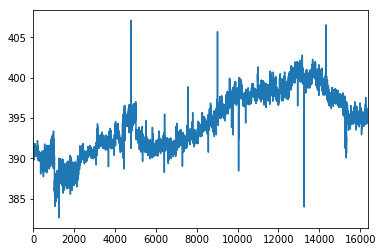

In [2]:
data['TCCON'].plot()

In [3]:
data.isna().sum()

TCCON    0
OCO2     0
Time     0
dtype: int64

In [4]:
target= 'OCO2'
features= 'TCCON'
X=data.drop(features,axis=1)
y=data.TCCON
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [5]:
X[:10]

,OCO2,Time
0,415.55417,1
1,416.95264,2
2,417.24985,3
3,417.09082,4
4,415.54858,5
5,415.42316,6
6,415.64470,7
7,416.45444,8
8,416.68768,9
9,416.28560,10


In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
grid={'n_estimators':np.arange(10,100,10),
     'max_features':['auto','sqrt',1,0.5],
     'max_depth':[None ,3,5,10],
     'min_samples_leaf':np.arange(1,30,2),
     'min_samples_split':np.arange(2,30,2)}

In [8]:
from sklearn.model_selection import RandomizedSearchCV
rs_rf=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=3),param_distributions=grid,cv=5,verbose=True,n_iter=5)
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [9]:
rs_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 22,
 'n_estimators': 70}

In [10]:
y_pred=rs_rf.predict(X_test)

In [11]:
y_pred[:10]

array([391.07138607, 398.60557763, 390.54400113, 387.97644629,
       393.71786983, 394.39790416, 398.36643069, 399.06743284,
       391.71237172, 391.63224186])

In [12]:
y_test[:10]

6975     390.78
11201    398.64
2839     390.76
1570     388.72
7587     393.37
4823     394.87
10201    398.72
13298    398.41
6497     391.52
6525     391.32
Name: TCCON, dtype: float64

In [13]:
#model= xgb.XGBRegressor()
#rf=RandomForestRegressor()
#rf.fit(train_data[features].values.reshape(-1,1), train_data[target])
#model.fit(train_data[features], train_data[target])

In [25]:
# Accuracy of model
rs_rf.score(X_test,y_test)*100

97.75612093942169

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
mean_absolute_error(y_test,y_pred)
#abs(y_true-y_pred)/N

0.34707415429724786

In [17]:
mean_squared_error(y_test,y_pred)

0.29565107597657064

In [24]:
pip install -U notebook-as-pdf

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement notebook-as-pdf (from versions: none)
ERROR: No matching distribution found for notebook-as-pdf
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
